In [38]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

In [39]:
data = pd.read_csv(r"C:\Users\harsh\Downloads\loan_approval.csv")

In [40]:
data.head()

,name,city,income,credit_score,loan_amount,years_employed,points,loan_approved
0,Allison Hill,East Jill,113810,389,39698,27,50.0,False
1,Brandon Hall,New Jamesside,44592,729,15446,28,55.0,False
2,Rhonda Smith,Lake Roberto,33278,584,11189,13,45.0,False
3,Gabrielle Davis,West Melanieview,127196,344,48823,29,50.0,False
4,Valerie Gray,Mariastad,66048,496,47174,4,25.0,False


In [41]:
#drop name column if it exist
if 'name' in data.columns:
    data = data.drop('name',axis = 1)


In [42]:
data.head()

,city,income,credit_score,loan_amount,years_employed,points,loan_approved
0,East Jill,113810,389,39698,27,50.0,False
1,New Jamesside,44592,729,15446,28,55.0,False
2,Lake Roberto,33278,584,11189,13,45.0,False
3,West Melanieview,127196,344,48823,29,50.0,False
4,Mariastad,66048,496,47174,4,25.0,False


In [43]:
if 'city' in data.columns:
    data = data.drop('city',axis=1)

In [44]:
#convert categorial column into nuerical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['loan_approved']= le.fit_transform(data['loan_approved'].astype(str))

In [45]:
data.head()

,income,credit_score,loan_amount,years_employed,points,loan_approved
0,113810,389,39698,27,50.0,0
1,44592,729,15446,28,55.0,0
2,33278,584,11189,13,45.0,0
3,127196,344,48823,29,50.0,0
4,66048,496,47174,4,25.0,0


In [46]:
#split feature and target
x = data.drop('loan_approved', axis = 1)
y = data['loan_approved']


In [47]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 42)

In [48]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [49]:
#make prediction
y_pred = model.predict(x_test)


In [50]:
#create table of actual and prediction
result = pd.DataFrame({
    'Actual':y_test.values,
    'Predicted':y_pred
})

In [52]:
print("Accuracy:",accuracy_score(y_test,y_pred))
print("classification Report:",classification_report(y_test,y_pred))

Accuracy: 1.0
classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       217
           1       1.00      1.00      1.00       183

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



In [53]:
#display the result table
print("\n Prediction Table :\n")
print(result.head(10))


 Prediction Table :

   Actual  Predicted
0       0          0
1       1          1
2       1          1
3       1          1
4       1          1
5       1          1
6       0          0
7       1          1
8       0          0
9       1          1


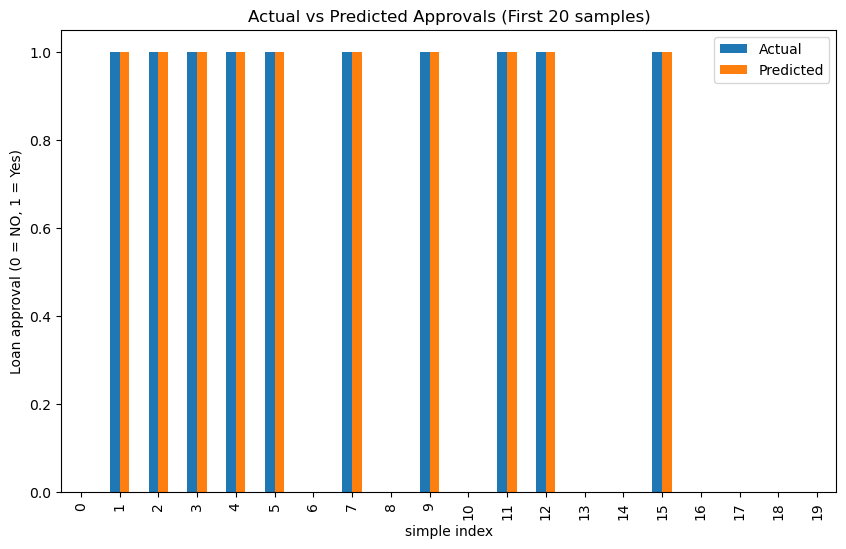

In [54]:
#plot a graph of actual vs predicted
result = pd.DataFrame({
    'Actual':y_test.values,
    'Predicted':y_pred
})
result.head(20).plot(kind='bar',figsize=(10,6))
plt.title("Actual vs Predicted Approvals (First 20 samples)")
plt.xlabel("simple index")
plt.ylabel("Loan approval (0 = NO, 1 = Yes)")
plt.legend(["Actual","Predicted"])
plt.show()

In [56]:
#Decision tree visuallization
plt.figure(figsize=(18,10))
plt.tree(model,feature_names=x.columns,class_names = ['Not Approved','Approved'],filled=True)
plt.title("Decision tree Visualization")
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'tree'

<Figure size 1800x1000 with 0 Axes>